In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
%matplotlib notebook

In [4]:
def rotation_3d(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians in 3D space.
    
    Args:
        axis (list): 3D array. Axis of rotation.
        theta (float): Angle of rotation in radians.
        
    Returns:
        list: 3x3 rotation matrix.
    """
    axis = np.asarray(axis)
    axis = axis / math.sqrt(np.dot(axis, axis))
    a = math.cos(theta / 2.0)
    b, c, d = -axis * math.sin(theta / 2)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                     [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])

In [5]:
def rotation_2d(theta):
    """
    Return the rotation matrix associated with counterclockwise rotation
    by theta radians in 2D space.
    
    Args:
        theta (float): Angle of rotation in radians.
        
    Returns:
        list: 2x2 rotation matrix.
    """
    c, s = np.cos(theta), np.sin(theta)
    return np.array(((c, -s), (c, s)))

In [6]:
def plot_vectors(vectors, limit=1):
    """
    Plot 3D vectors starting from origin (0, 0, 0).
    
    Args:
        vectors (list): List of vectors to plot.
        lim (float): Limit of X, Y and Z axes.
    """
    vectors = list(map(lambda x: np.concatenate(([0, 0, 0], x)), vectors))
    X, Y, Z, U, V, W = zip(*vectors)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    q = ax.quiver(X, Y, Z, U, V, W)
    q.set_array
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([-limit, limit])
    ax.set_ylim([-limit, limit])
    ax.set_zlim([-limit, limit])
    plt.show()

In [7]:
# Rotation of 2D acceleration. Calculated correctly.
acc = np.array([0.71, 0.71])
rot_acc = rotation_2d(45).dot(acc)
print(rot_acc)

[-0.23116289  0.97712011]


<IPython.core.display.Javascript object>


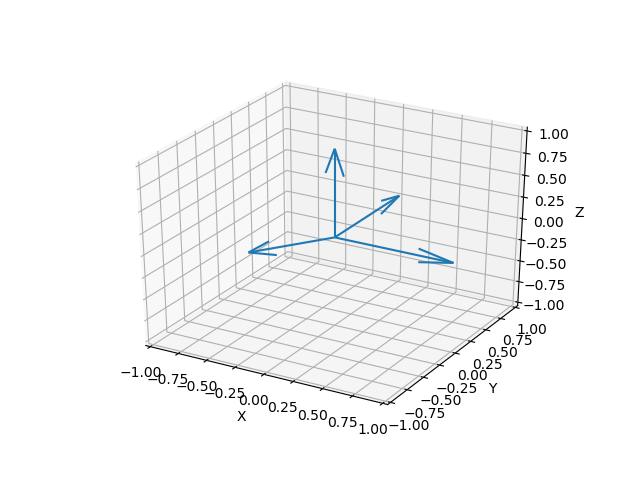

In [9]:
acc = [0, 0, -1]
axis_x = [1, 0, 0]
axis_y = [0, 1, 0]
axis_z = [0, 0, 1]

acc1 = rotation_3d(axis_x, math.pi / 4).dot(acc)
acc2 = rotation_3d(axis_y, math.pi / 4).dot(acc1)
acc3 = rotation_3d(axis_z, math.pi / 4).dot(acc2)

plot_vectors([axis_x, axis_y, axis_z, acc3])

In [10]:
type("test")

str